In [65]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tmdbsimple as tmdb
import pandas as pd
import numpy as np
from ast import literal_eval
from collections import Counter
import scipy
sns.set_context('talk')
sns.set_style('ticks')
import warnings
warnings.filterwarnings("ignore")

In [66]:
#time collections

#1 core total times
totals_1c = []
bin_sizes = [10000, 100000, 1000000, 10000000, 100000000, 1000000000]

#collect 1M bin size run times
totals_1m = []
cores_1m = [1, 2, 4, 8, 16, 20]

In [68]:
#Bin size 10k, 1 core
t10k1c = pd.read_csv('data/basic_parallel_timings/DNA/DNA.10000bin.cores1.runtime.txt', 
                    sep='\t', header=None, names=['Chromosome & Range', 'start_position', 'bin_time'])

#grab total time for run
t10k1c_total = t10k1c.iloc[[-1]].bin_time.values[0]
totals_1c.append(t10k1c_total)
#drop last two rows, which are run times
t10k1c.drop(t10k1c.tail(2).index,inplace=True)
#simple metrics
print('Bin size: 100000, Cores: 1')
print('Total Time (hours):', t10k1c_total/60/60)
print('\nMetrics (seconds):')
print(t10k1c.bin_time.describe())
print('Coeff of variation', scipy.stats.variation(t10k1c.bin_time))
# sns.boxplot(t10k1c.bin_time)
# plt.xscale('log');

Bin size: 100000, Cores: 1
Total Time (hours): 17.336597472363056

Metrics (seconds):
count    24926.000000
mean         2.124021
std          1.271326
min          0.318347
25%          1.805215
50%          1.893843
75%          2.403581
max         88.781436
Name: bin_time, dtype: float64
Coeff of variation 0.5985346917936272


In [5]:
#value and index of max bin time interval
t10k1c.bin_time.max(), np.argmax(t10k1c.bin_time)

(88.78143620491029, 11194)

In [69]:
#Bin size 100k, 1 core
t100k1c = pd.read_csv('data/basic_parallel_timings/DNA/DNA.100000bin.cores1.runtime.txt', 
                    sep='\t', header=None, names=['Chromosome & Range', 'start_position', 'bin_time'])

#grab total time for run
t100k1c_total = t100k1c.iloc[[-1]].bin_time.values[0]
totals_1c.append(t100k1c_total)
#drop last two rows, which are run times
t100k1c.drop(t100k1c.tail(2).index,inplace=True)
#simple metrics
print('Bin size: 1000000, Cores: 1')
print('Total Time (hours):', t100k1c_total/60/60)
print('\nMetrics (seconds):')
print(t100k1c.bin_time.describe())
print('Coeff of variation', scipy.stats.variation(t100k1c.bin_time))
# sns.boxplot(t100k1c.bin_time);

Bin size: 1000000, Cores: 1
Total Time (hours): 1.7884228760666308

Metrics (seconds):
count    2493.000000
mean        2.041197
std         0.739367
min         0.289840
25%         1.946275
50%         2.030528
75%         2.194647
max        11.140260
Name: bin_time, dtype: float64
Coeff of variation 0.3621497973266269


In [70]:
#Bin size 1M, 1 core
t1m1c = pd.read_csv('data/basic_parallel_timings/DNA/DNA.1000000bin.cores1.runtime.txt', 
                    sep='\t', header=None, names=['Chromosome & Range', 'start_position', 'bin_time'])

#grab total time for run
t1m1c_total = t1m1c.iloc[[-1]].bin_time.values[0]
totals_1m.append(t1m1c_total)
totals_1c.append(t1m1c_total)
#drop last two rows, which are run times
t1m1c.drop(t1m1c.tail(2).index,inplace=True)
#simple metrics
print('Bin size: 1M, Cores: 1')
print('Total Time (hours):', t1m1c_total/60/60)
print('\nMetrics (seconds):')
print(t1m1c.bin_time.describe())
print('Coeff of variation', scipy.stats.variation(t1m1c.bin_time))
# sns.boxplot(t1m1c.bin_time);

Bin size: 1M, Cores: 1
Total Time (hours): 0.2997281845410667

Metrics (seconds):
count    250.000000
mean       3.794946
std        1.880434
min        0.365276
25%        2.944352
50%        3.584858
75%        4.362392
max       13.986383
Name: bin_time, dtype: float64
Coeff of variation 0.4945179799265091


In [71]:
#Bin size 1M, 2 core
t1m2c = pd.read_csv('data/basic_parallel_timings/DNA/DNA.1000000bin.cores2.runtime.txt', 
                    sep='\t', header=None, names=['Chromosome & Range', 'start_position', 'bin_time'])

#grab total time for run
t1m2c_total = t1m2c.iloc[[-1]].bin_time.values[0]
totals_1m.append(t1m2c_total)
#drop last two rows, which are run times
t1m2c.drop(t1m2c.tail(2).index,inplace=True)
#simple metrics
print('Bin size: 1M, Cores: 2')
print('Total Time (hours):', t1m2c_total/60/60)
print('\nMetrics (seconds):')
print(t1m2c.bin_time.describe())
print('Coeff of variation', scipy.stats.variation(t1m2c.bin_time))
# sns.boxplot(t1m2c.bin_time);

Bin size: 1M, Cores: 2
Total Time (hours): 0.17187269594934249

Metrics (seconds):
count    250.000000
mean       4.404824
std        1.876795
min        0.384391
25%        3.527175
50%        4.308980
75%        5.132249
max       13.660452
Name: bin_time, dtype: float64
Coeff of variation 0.42522425486418225


In [72]:
#Bin size 1M, 4 core
t1m4c = pd.read_csv('data/basic_parallel_timings/DNA/DNA.1000000bin.cores4.runtime.txt', 
                    sep='\t', header=None, names=['Chromosome & Range', 'start_position', 'bin_time'])

#grab total time for run
t1m4c_total = t1m4c.iloc[[-1]].bin_time.values[0]
totals_1m.append(t1m4c_total)
#drop last two rows, which are run times
t1m4c.drop(t1m4c.tail(2).index,inplace=True)
#simple metrics
print('Bin size: 1M, Cores: 4')
print('Total Time (hours):', t1m4c_total/60/60)
print('\nMetrics (seconds):')
print(t1m4c.bin_time.describe())
print('Coeff of variation', scipy.stats.variation(t1m4c.bin_time))
# sns.boxplot(t1m4c.bin_time);

Bin size: 1M, Cores: 4
Total Time (hours): 0.07502528442276861

Metrics (seconds):
count    250.000000
mean       3.736879
std        1.642756
min        0.363381
25%        2.993476
50%        3.621155
75%        4.448800
max       12.501389
Name: bin_time, dtype: float64
Coeff of variation 0.43872635812676575


In [73]:
#Bin size 1M, 8 core
t1m8c = pd.read_csv('data/basic_parallel_timings/DNA/DNA.1000000bin.cores8.runtime.txt', 
                    sep='\t', header=None, names=['Chromosome & Range', 'start_position', 'bin_time'])

#grab total time for run
t1m8c_total = t1m8c.iloc[[-1]].bin_time.values[0]
totals_1m.append(t1m8c_total)
#drop last two rows, which are run times
t1m8c.drop(t1m8c.tail(2).index,inplace=True)
#simple metrics
print('Bin size: 1M, Cores: 8')
print('Total Time (hours):', t1m8c_total/60/60)
print('\nMetrics (seconds):')
print(t1m8c.bin_time.describe())
print('Coeff of variation', scipy.stats.variation(t1m8c.bin_time))
# sns.boxplot(t1m8c.bin_time);

Bin size: 1M, Cores: 8
Total Time (hours): 0.0401987338728375

Metrics (seconds):
count    250.000000
mean       3.968843
std        1.770699
min        0.327456
25%        3.209023
50%        3.820687
75%        4.764226
max       13.064627
Name: bin_time, dtype: float64
Coeff of variation 0.44525669406216456


In [75]:
#Bin size 1M, 16 core
t1m16c = pd.read_csv('data/basic_parallel_timings/DNA/DNA.1000000bin.cores16.runtime.txt', 
                    sep='\t', header=None, names=['Chromosome & Range', 'start_position', 'bin_time'])

#grab total time for run
t1m16c_total = t1m16c.iloc[[-1]].bin_time.values[0]
totals_1m.append(t1m16c_total)
#drop last two rows, which are run times
t1m16c.drop(t1m16c.tail(2).index,inplace=True)
#simple metrics
print('Bin size: 1M, Cores: 16')
print('Total Time (hours):', t1m16c_total/60/60)
print('\nMetrics (seconds):')
print(t1m16c.bin_time.describe())
print('Coeff of variation', scipy.stats.variation(t1m16c.bin_time))
# sns.boxplot(t1m16c.bin_time);

Bin size: 1M, Cores: 16
Total Time (hours): 0.02080370816919539

Metrics (seconds):
count    250.000000
mean       3.980357
std        1.746742
min        0.341954
25%        3.216886
50%        3.817793
75%        4.874962
max       13.243645
Name: bin_time, dtype: float64
Coeff of variation 0.43796206485012446


In [76]:
#Bin size 1M, 20 core
t1m20c = pd.read_csv('data/basic_parallel_timings/DNA/DNA.1000000bin.cores20.runtime.txt', 
                    sep='\t', header=None, names=['Chromosome & Range', 'start_position', 'bin_time'])

#grab total time for run
t1m20c_total = t1m20c.iloc[[-1]].bin_time.values[0]
totals_1m.append(t1m20c_total)
#drop last two rows, which are run times
t1m20c.drop(t1m20c.tail(2).index,inplace=True)
#simple metrics
print('Bin size: 1M, Cores: 20')
print('Total Time (hours):', t1m20c_total/60/60)
print('\nMetrics (seconds):')
print(t1m20c.bin_time.describe())
print('Coeff of variation', scipy.stats.variation(t1m20c.bin_time))
# sns.boxplot(t1m20c.bin_time);

Bin size: 1M, Cores: 20
Total Time (hours): 0.017831149432394253

Metrics (seconds):
count    250.000000
mean       4.239568
std        1.935367
min        0.358304
25%        3.311384
50%        4.148354
75%        5.013684
max       13.030503
Name: bin_time, dtype: float64
Coeff of variation 0.45558711635140386


In [77]:
#Bin size 10M, 1 core
t10m1c = pd.read_csv('data/basic_parallel_timings/DNA/DNA.10000000bin.cores1.runtime.txt', 
                    sep='\t', header=None, names=['Chromosome & Range', 'start_position', 'bin_time'])

#grab total time for run
t10m1c_total = t10m1c.iloc[[-1]].bin_time.values[0]
totals_1c.append(t10m1c_total)
#drop last two rows, which are run times
t10m1c.drop(t10m1c.tail(2).index,inplace=True)
#simple metrics
print('Bin size: 10M, Cores: 1')
print('Total Time (hours):', t10m1c_total/60/60)
print('\nMetrics (seconds):')
print(t10m1c.bin_time.describe())
print('Coeff of variation', scipy.stats.variation(t10m1c.bin_time))
# sns.boxplot(t10m1c.bin_time);

Bin size: 10M, Cores: 1
Total Time (hours): 0.1454639552036922

Metrics (seconds):
count    25.000000
mean     20.339517
std       9.336811
min       0.343936
25%      15.966598
50%      18.361459
75%      24.319761
max      44.222074
Name: bin_time, dtype: float64
Coeff of variation 0.4497731772329787


In [78]:
#Bin size 100M, 1 core
t100m1c = pd.read_csv('data/basic_parallel_timings/DNA/DNA.100000000bin.cores1.runtime.txt', 
                    sep='\t', header=None, names=['Chromosome & Range', 'start_position', 'bin_time'])

#grab total time for run
t100m1c_total = t100m1c.iloc[[-1]].bin_time.values[0]
totals_1c.append(t100m1c_total)
#drop last two rows, which are run times
t100m1c.drop(t100m1c.tail(2).index,inplace=True)
#simple metrics
print('Bin size: 100M, Cores: 1')
print('Total Time (hours):', t100m1c_total/60/60)
print('\nMetrics (seconds):')
print(t100m1c.bin_time.describe())
print('Coeff of variation', scipy.stats.variation(t100m1c.bin_time))
# sns.boxplot(t100m1c.bin_time);

Bin size: 100M, Cores: 1
Total Time (hours): 0.1258151196108925

Metrics (seconds):
count      3.000000
mean     150.313449
std       54.250483
min       87.764245
25%      133.191839
50%      178.619433
75%      181.588051
max      184.556669
Name: bin_time, dtype: float64
Coeff of variation 0.29468643180911924


In [79]:
#Bin size 100M, 1 core
t1b1c = pd.read_csv('data/basic_parallel_timings/DNA/DNA.1000000000bin.cores1.runtime.txt', 
                    sep='\t', header=None, names=['Chromosome & Range', 'start_position', 'bin_time'])

#grab total time for run
t1b1c_total = t1b1c.iloc[[-1]].bin_time.values[0]
totals_1c.append(t1b1c_total)
#drop last two rows, which are run times
t1b1c.drop(t1b1c.tail(2).index,inplace=True)
#simple metrics
print('Bin size: 1B, Cores: 1')
print('Total Time (hours):', t1b1c_total/60/60)
print('\nMetrics (seconds):')
print(t1b1c.bin_time.describe())
print('Coeff of variation', scipy.stats.variation(t1b1c.bin_time))
# sns.boxplot(t1b1c.bin_time);

Bin size: 1B, Cores: 1
Total Time (hours): 0.14612035267882892

Metrics (seconds):
count      1.000000
mean     525.464123
std             NaN
min      525.464123
25%      525.464123
50%      525.464123
75%      525.464123
max      525.464123
Name: bin_time, dtype: float64
Coeff of variation 0.0


In [80]:
#side-by-side boxplots of bin time
df1m = pd.DataFrame(
    {'1': t1m1c.bin_time,
     '2': t1m2c.bin_time,
     '4': t1m4c.bin_time,
     '8': t1m8c.bin_time,
     '16': t1m16c.bin_time,
     '20': t1m20c.bin_time
    })
df1m = df1m[['1','2','4','8','16','20']]
df1m.head()

,1,2,4,8,16,20
0,3.916871,4.978713,3.876518,3.592667,3.450031,3.686239
1,4.298775,4.195014,3.931005,4.047092,3.471656,3.702895
2,3.531452,3.944107,4.053967,4.071075,3.355170,3.540197
3,3.676994,4.085724,4.858817,4.413094,3.901576,3.439025
4,2.926028,3.280100,2.914779,4.939919,4.086812,4.400740


Text(0.5,1,'Run Times vs. Cores for Bin Size 1 Million')

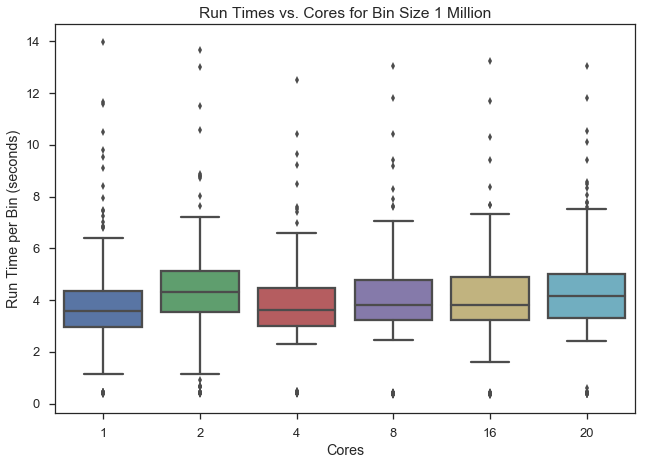

In [81]:
sns.boxplot(df1m)
plt.xlabel('Cores')
plt.ylabel('Run Time per Bin (seconds)')
plt.title('Run Times vs. Cores for Bin Size 1 Million')

In [82]:
#side-by-side boxplots of bin time
df1c = pd.DataFrame(
    {'10000': t10k1c.bin_time,
     '100000': t100k1c.bin_time,
     '1000000': t1m1c.bin_time,
     '10000000': t10m1c.bin_time,
     '100000000': t100m1c.bin_time,
     '1000000000': t1b1c.bin_time
    })
df1c = df1c[['10000','100000','1000000','10000000','100000000','1000000000']]
df1c.head()

,10000,100000,1000000,10000000,100000000,1000000000
0,1.029438,2.530859,3.916871,19.189404,184.556669,525.464123
1,9.278319,1.952498,4.298775,32.354807,178.619433,NaN
2,2.137897,1.931003,3.531452,25.143378,87.764245,NaN
3,2.640770,2.076280,3.676994,24.319761,NaN,NaN
4,2.543097,1.925354,2.926028,25.031033,NaN,NaN


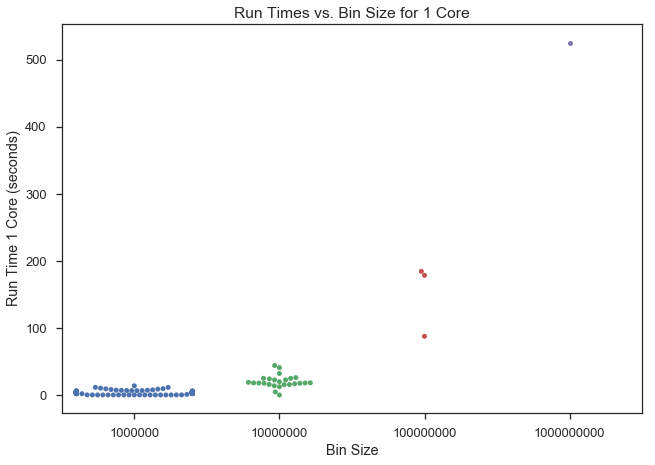

In [83]:
#swarmplot for 1 core run time vs. bin size
sns.swarmplot(data = df1c[['1000000','10000000','100000000','1000000000']])
plt.xlabel('Bin Size')
plt.ylabel('Run Time 1 Core (seconds)')
plt.title('Run Times vs. Bin Size for 1 Core');

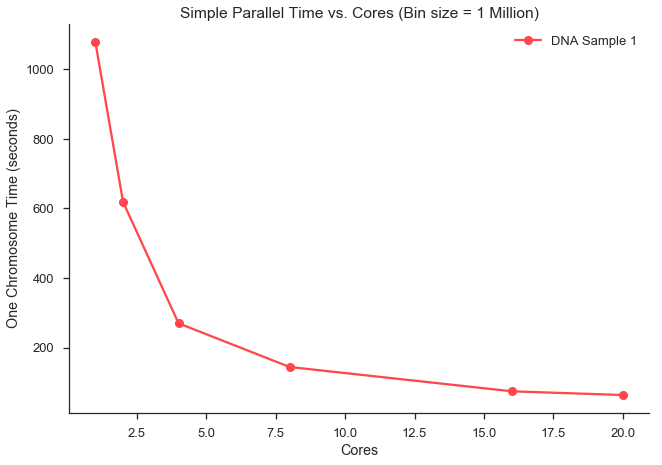

In [84]:
#plot time vs. cores for bin size = 1000000
plt.plot(cores_1m, totals_1m, '-o', c = '#ff474c', label='DNA Sample 1')
# plt.xscale('log')
plt.title('Simple Parallel Time vs. Cores (Bin size = 1 Million)')
plt.xlabel('Cores')
plt.ylabel('One Chromosome Time (seconds)')
plt.legend(loc = 'best')
# plt.xticks(cores_1m)
sns.despine();

ValueError: x and y must have same first dimension, but have shapes (6,) and (7,)

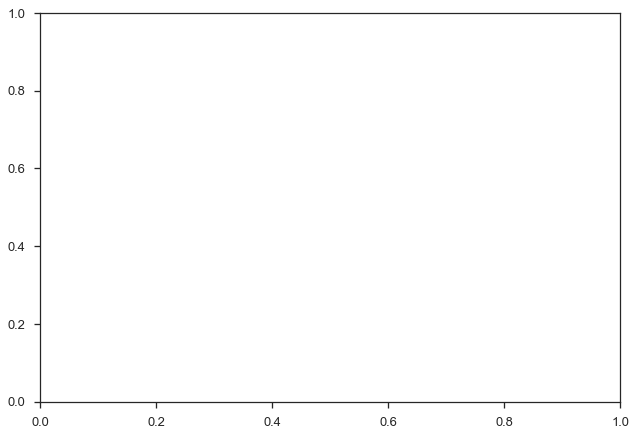

In [85]:
#plot time vs. bin size for 1 core execution
plt.plot(bin_sizes, totals_1c, '-o', c = '#ff474c', label='DNA Sample 1')
# plt.xscale('log')
plt.title('Execution Time vs. Bin Size (1 Core)')
plt.xlabel('Bin Size')
plt.ylabel('One Chromosome Time (seconds)')
plt.legend(loc = 'best')
plt.xscale('log')
plt.axvline(1000000, c = 'k', linestyle='dashed')
sns.despine();